<a href="https://colab.research.google.com/github/Mayank1911/Netflix-Movies-and-TV-Shows-Clustering/blob/main/Netflix_Movies_and_TV_Shows_Clustering_Capstone_Project_by_Mayank_Sawant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - Clustering
##### **Contribution**    - Individual
##### **Team Member 1 -** Mayank Sawant

# **Project Summary -**

As movie industry is evolving into streaming platforms, there’s no doubt that Netflix has become one of the important platforms for streaming. The dataset that we have used for EDA and clustering has been collected by Flixable, a third-party Netflix search engine. There are 12 features and around 7700 observations in the dataset and are mostly textual features

Our main objectives of this project are to do exploratory analysis and find useful insights from dataset, to understand what type content is available in different countries, also to find out is Netflix has increasingly focused on TV rather than movies in recent years and at last to do clustering of similar
content by matching text-based features from dataset.


# **GitHub Link -**

https://github.com/Mayank1911/Netflix-Movies-and-TV-Shows-Clustering

# **Problem Statement**


This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

# **Dataset Information**



*   Number of instances: 7787
*   Number of attributes: 12

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# installing required library
! pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 2.9 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=0672e3d2d51051084a1d6d26a6f9ba8eb3c6f8c11a1d869abf4834204de988b6
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


In [ ]:
# import all required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score, silhouette_samples
import scipy.cluster.hierarchy as sch
import umap.umap_ as umap
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import AgglomerativeClustering

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

### Dataset Loading

In [ ]:
# mounting gdrive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Loading dataset
file_path = '/content/gdrive/MyDrive/Netflix Movies and TV Shows Clustering/NETFLIX MOVIES AND TV SHOWS CLUSTERING (1).csv'
df = pd.read_csv(file_path)

### Dataset First View

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset Rows & Columns count

In [ ]:
# checking dataset shape
df.shape

(7787, 12)

### Dataset Information

In [ ]:
# dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
df.isnull().sum().sort_values(ascending=False).head()

director      2389
cast           718
country        507
date_added      10
rating           7
dtype: int64

## 2. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# replacing missing values by 'Not Mentioned'
df['cast'].fillna(value='Not Mentioned',inplace=True)
df['country'].fillna(value='Not Mentioned',inplace=True)
df['director'].fillna(value='Not Mentioned',inplace=True)

In [ ]:
# dropping null values
df.dropna(subset=['date_added'], inplace=True)
df.dropna(subset=['rating'], inplace=True)

In [ ]:
# rechecking for null values
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [ ]:
# adding some new features
df["date_added"] = pd.to_datetime(df['date_added'])
df['day_added'] = df['date_added'].dt.day
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

In [ ]:
# dropping unneccessary column
df = df.drop('show_id',axis='columns')

In [ ]:
# final check before EDA
df.head(5)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,year_added,month_added
0,TV Show,3%,Not Mentioned,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,14,2020,8
1,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,23,2016,12
2,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",20,2018,12
3,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",16,2017,11
4,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,1,2020,1


## ***3. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# content type value counts
df['type'].value_counts()

Movie      5372
TV Show    2398
Name: type, dtype: int64

Movie      5372
TV Show    2398
Name: type, dtype: int64


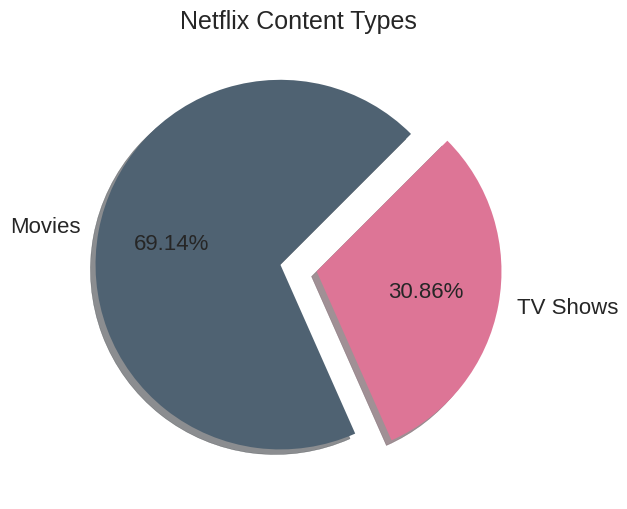

In [ ]:
# pie chart for content type
labels=['Movies','TV Shows']
colors = ['#4F6272','#DD7596']
print(df['type'].value_counts())
plt.figure(figsize=(8,6))
plt.pie(df['type'].value_counts(), labels=labels, colors=colors, autopct = '%0.2f%%', startangle = 45, explode = [0.1,0.1], shadow = True, textprops={'fontsize': 16})
plt.title('Netflix Content Types', fontsize = 18)
plt.show()

##### 1. Why did you pick the specific chart?

The chart chosen is a count plot, which is a type of bar chart. It's suitable for visualizing the distribution of a categorical variable, in this case, the "Bankrupt?" variable. This chart helps to quickly understand the balance between the two classes (bankrupt and not bankrupt) and is useful for identifying any class imbalance.

##### 2. What is/are the insight(s) found from the chart?

The pie chart reveals that Netflix has a larger proportion of movies (69.14%) compared to TV shows (30.86%). This insight suggests that Netflix's content library is predominantly focused on movies. Understanding this distribution is crucial for content acquisition and production strategies, as it indicates viewer preferences.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights can have a positive business impact by guiding content investment decisions. For instance, if TV shows gain popularity or if there's a growing demand for TV content, Netflix may consider increasing investments in TV show production to cater to diverse viewer preferences, potentially leading to increased subscriber retention and acquisition. Additionally, it aids in targeted marketing strategies to attract audiences with specific content preferences, contributing to a more tailored and engaging user experience.

The pie chart alone doesn't inherently suggest negative growth; however, if there is a lack of diversity in the content portfolio and viewer preferences shift away from movies, it could potentially lead to negative growth. Over-reliance on movies might pose a risk if the demand for TV shows or other types of content increases. To mitigate this, it's important for Netflix to regularly reassess and adapt its content strategy to align with evolving consumer preferences and maintain a diverse and appealing content library to sustain positive growth.

#### Chart - 2

In [ ]:
# content added over the years
year_added = df['year_added'].value_counts().iloc[0:21]
year_added_df = pd.DataFrame(year_added)
year_added_df.reset_index(inplace = True)
year_added_df.rename(columns = {'index':'year','year_added':'count'},inplace = True)
year_added_df = year_added_df.sort_values(by='year')

2019    2153
2020    2009
2018    1684
2017    1222
2016     440
2021     117
2015      88
2014      25
2011      13
2013      11
2012       3
2008       2
2009       2
2010       1
Name: year_added, dtype: int64


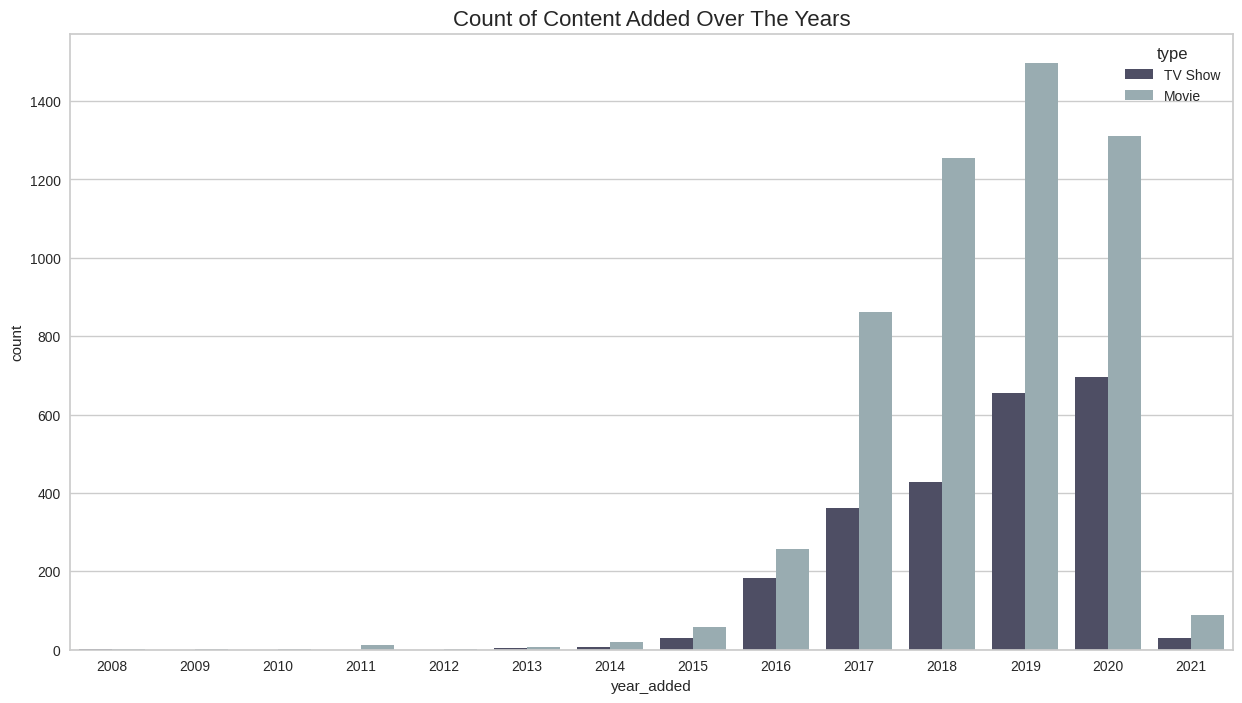

In [ ]:
# plotting content added over the years
plt.figure(figsize=(15,8))
print(df['year_added'].value_counts())
sns.countplot(x=df['year_added'],palette="bone",order=year_added_df['year'],hue=df['type'])
plt.title('Count of Content Added Over The Years', fontsize=16)
plt.show()

##### 1. Why did you pick the specific chart?

I picked a countplot with a hue for the type (Movies and TV Shows) because it effectively visualizes the distribution of content additions over the years, providing a clear comparison between different types.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals that content additions peaked in 2019 and declined in subsequent years. Additionally, it shows the distribution of movie and TV show additions over time, offering insights into the platform's content growth dynamics.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights can positively impact business strategy by guiding decisions on content acquisition and production planning. For instance, identifying peak years allows strategic allocation of resources. However, the decline in content additions in recent years may pose a risk if not addressed. A potential negative impact could be decreased subscriber engagement and satisfaction, necessitating a proactive approach such as increased content production to maintain positive growth and competitiveness in the streaming market.

#### Chart - 3

In [ ]:
# creating df to store months and counts
months_df = pd.DataFrame(df.month_added.value_counts())
months_df.reset_index(inplace=True)
months_df.rename(columns={'index':'month', 'month_added':'count'}, inplace=True)

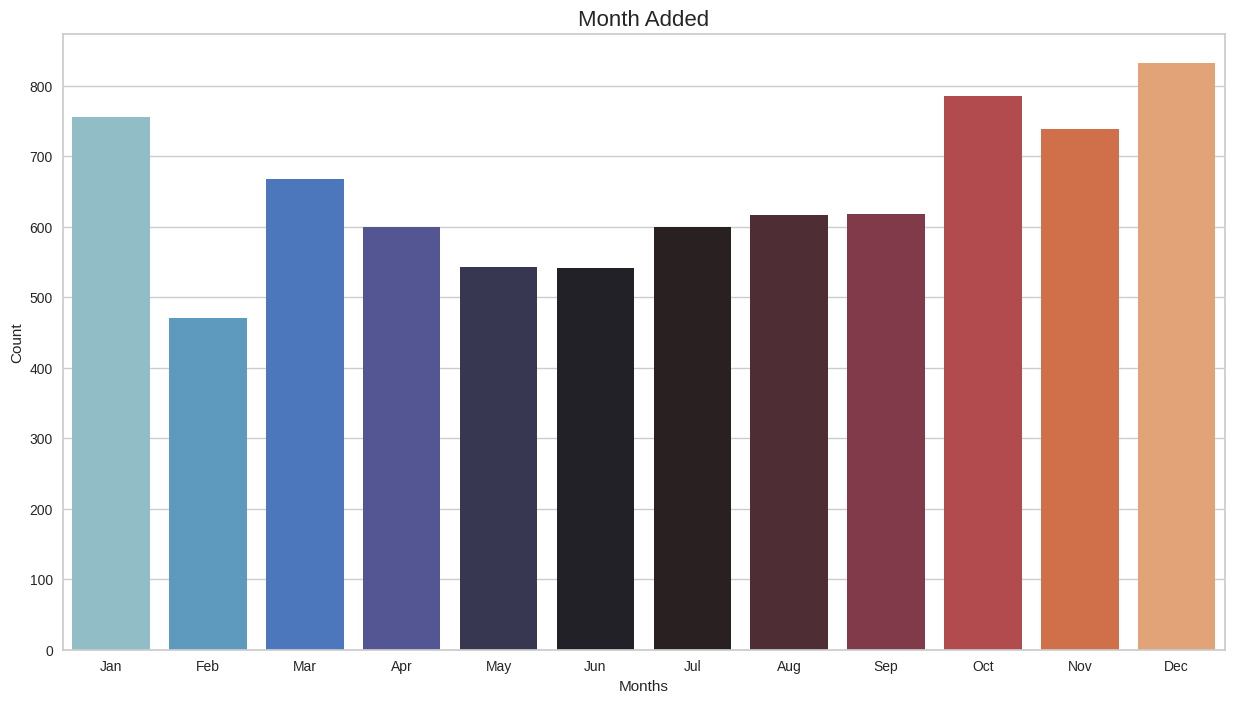

In [ ]:
# plotting month added
plt.figure(figsize = (15,8))
sns.barplot(x='month',y='count',data=months_df,palette="icefire")
plt.title('Month Added',fontsize=16)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11], labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.xlabel('Months')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

I selected a bar plot to visualize the count of content additions based on months. This type of chart is effective in comparing the content addition trends across different months, providing a clear and concise representation.

##### 2. What is/are the insight(s) found from the chart?

The bar plot indicates the variation in content additions across months. It has reveal patterns or trends related to the timing of content releases, like increase in content added in last 3 months, helping to identify strategic months for increased content offerings.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Insights from the chart can guide business decisions related to content release scheduling. For example, if certain months consistently show higher content additions, Netflix can strategically plan major releases during those periods to maximize audience engagement. However, a potential negative impact could arise if there are significant month-to-month fluctuations without a clear strategy. Inconsistencies in content additions might lead to uneven viewer engagement, emphasizing the need for a well-planned and consistent content release schedule to maintain positive growth and subscriber satisfaction.

#### Chart - 4

United States                                                   2546
India                                                            923
United Kingdom                                                   396
Japan                                                            224
South Korea                                                      183
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: country, Length: 681, dtype: int64


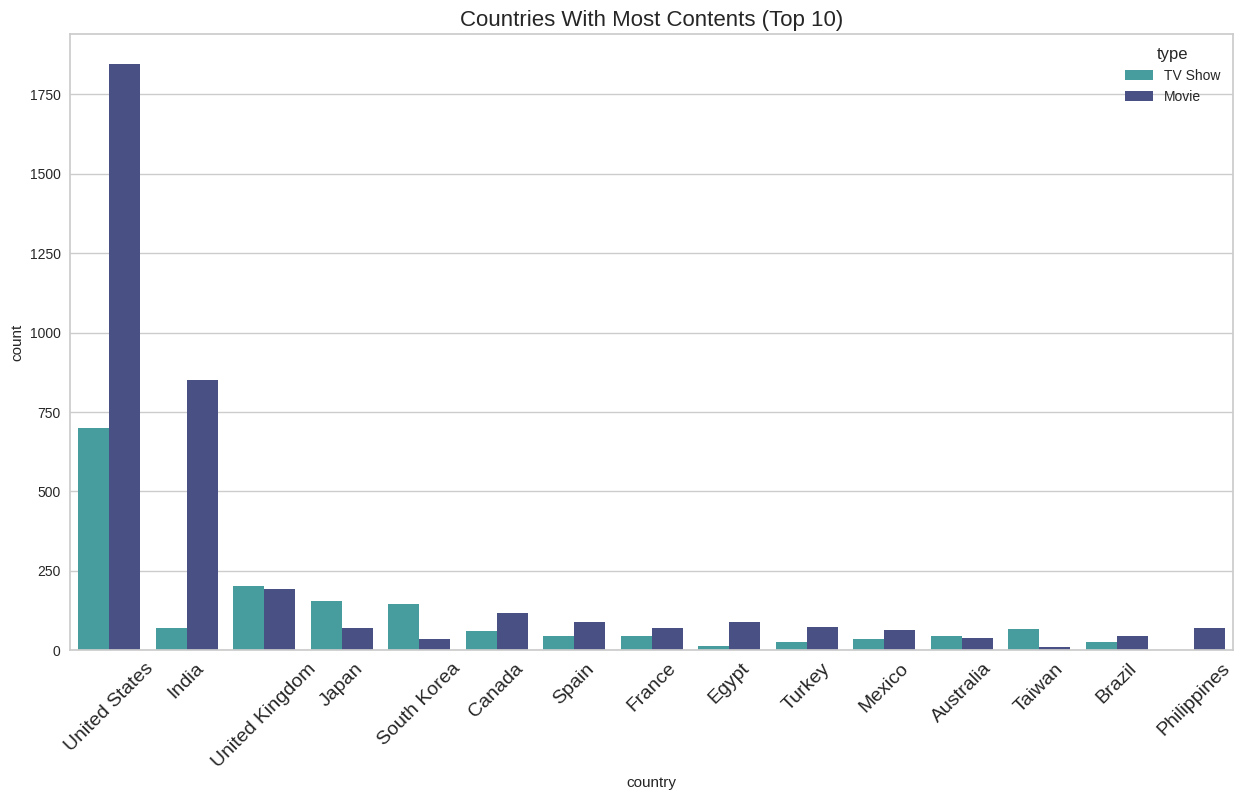

In [ ]:
# plotting top 10 countries with most content
country = df[df['country'] != 'Not Mentioned']
print(country['country'].value_counts())
plt.figure(figsize=(15,8))
sns.countplot(x=country['country'],palette="mako_r",order=country['country'].value_counts().index[0:15],hue=df['type'])
plt.title('Countries With Most Contents (Top 10)', fontsize=16)
plt.xticks(rotation=45,fontsize=14)
plt.show()

##### 1. Why did you pick the specific chart?

I opted for a horizontal countplot to visualize the top 10 countries with the most content. This chart allows for a clear comparison of content counts between different countries, with the added dimension of content type (Movies and TV Shows) depicted by color.

##### 2. What is/are the insight(s) found from the chart?

The countplot highlights the top 10 countries with the highest number of contents on Netflix. The United States leads by a significant margin, followed by India, the United Kingdom, Japan, and South Korea. This provides insights into the geographical distribution of Netflix content.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding the distribution of content across countries is essential for strategic planning. The dominance of the United States suggests a heavy focus on that market. While this may align with a large subscriber base, it could pose a risk of neglecting potential growth in other regions. To maximize global reach and appeal, Netflix may need to balance content investments across diverse markets. Neglecting content diversity globally might lead to missed growth opportunities in untapped regions, emphasizing the importance of a well-balanced international content strategy for sustained positive growth.

#### Chart - 5

TV-MA       2861
TV-14       1928
TV-PG        804
R            665
PG-13        386
TV-Y         279
TV-Y7        270
PG           247
TV-G         194
NR            83
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64


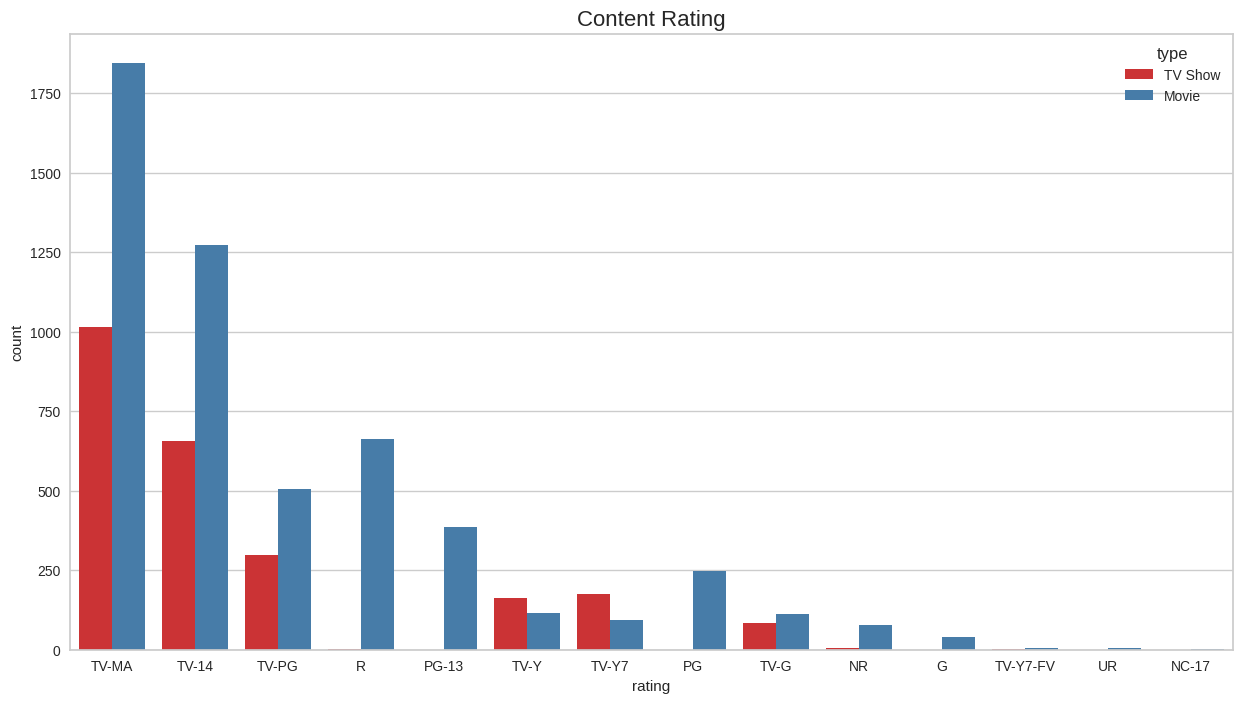

In [ ]:
# plotting content rating with their type
print(df['rating'].value_counts())
plt.figure(figsize=(15,8))
sns.countplot(x=df['rating'],palette="Set1",order=df['rating'].value_counts().index[0:],hue=df['type'])
plt.title('Content Rating', fontsize=16)
plt.show()

##### 1. Why did you pick the specific chart?

I chose a countplot to visualize the distribution of content ratings, categorized by type (Movies and TV Shows). This chart allows for a clear comparison of the count of each rating category, providing insights into the content rating landscape on Netflix.

##### 2. What is/are the insight(s) found from the chart?

The countplot illustrates the distribution of content ratings, with TV-MA being the most prevalent, followed by TV-14, TV-PG, and R. It provides a comprehensive overview of the content rating preferences among Netflix users for both movies and TV shows.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights can positively impact content curation and recommendation algorithms, helping Netflix tailor content suggestions to user preferences based on ratings. However, a potential negative impact may arise if there is an overemphasis on certain ratings to the detriment of a diverse content library. To sustain positive growth, Netflix should ensure a balanced mix of content across various rating categories to cater to a wide audience. Neglecting certain rating demographics may result in decreased user satisfaction and engagement, affecting the platform's overall growth.








#### Chart - 6

In [ ]:
# creating df to store release year and counts
release_year = df['release_year'].value_counts().iloc[0:21]
release_year_df = pd.DataFrame(release_year)
release_year_df.reset_index(inplace = True)
release_year_df.rename(columns = {'index':'year','release_year':'count'},inplace = True)
release_year_df = release_year_df.sort_values(by='year')

2018    1120
2017    1010
2019     996
2016     881
2020     868
        ... 
1925       1
1964       1
1966       1
1947       1
1959       1
Name: release_year, Length: 73, dtype: int64


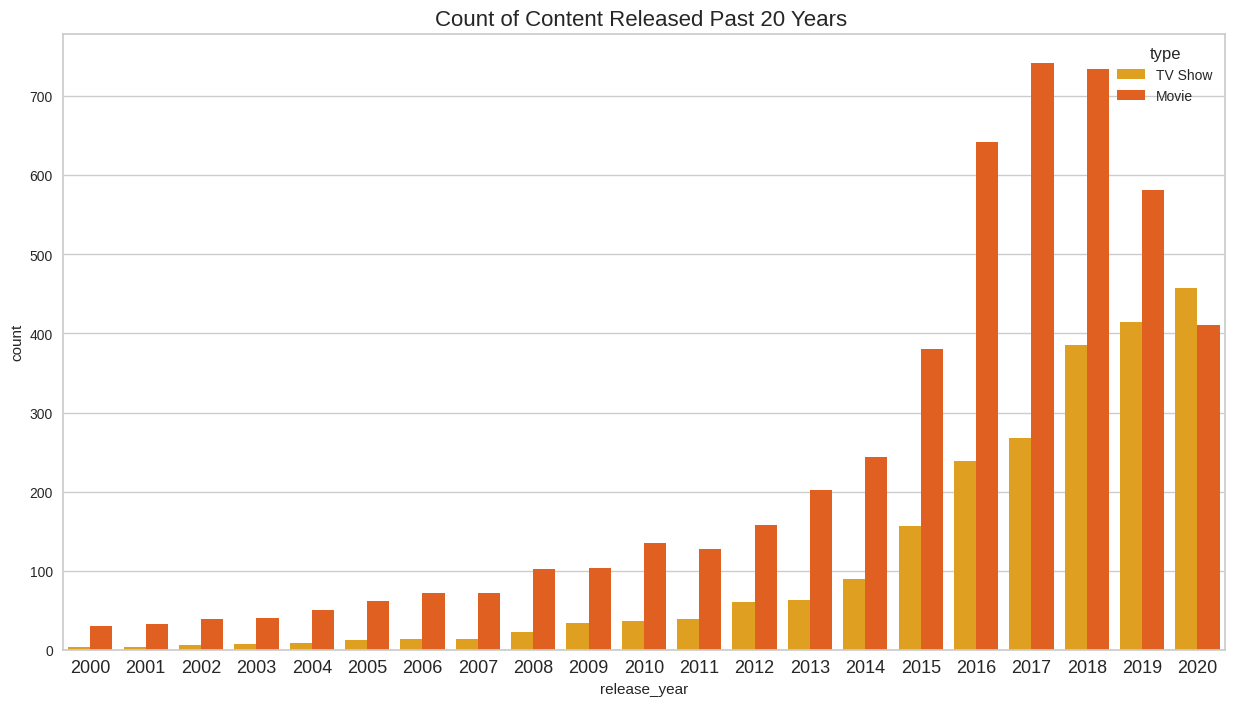

In [ ]:
# plotting content released past 20 years
plt.figure(figsize=(15,8))
sns.countplot(x=df['release_year'],palette="autumn_r",order=release_year_df['year'],hue=df['type'])
plt.title('Count of Content Released Past 20 Years ', fontsize=16)
plt.xticks(fontsize=13)
plt.show()

##### 1. Why did you pick the specific chart?

I opted for a countplot to visualize the count of content released over the past 20 years, categorized by release year and content type (Movies and TV Shows). This chart effectively captures trends in content production over time.

##### 2. What is/are the insight(s) found from the chart?

The countplot reveals that the most prolific years for content releases in the past two decades were 2018, 2017, and 2019. It offers insights into the dynamics of content production trends, showcasing the years with the highest and lowest release frequencies.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained can positively influence content acquisition and production strategies by highlighting peak years for releases. However, a potential negative impact may arise if there is a decline in content production in recent years, impacting the freshness and variety of available content. To ensure sustained positive growth, Netflix should assess and address any potential content production slowdowns, adapting strategies to maintain a diverse and engaging content library for subscribers.

#### Chart - 7

In [ ]:
# creating df to store director names and their content counts
director = df['director'].value_counts().iloc[1:16]
director_df = pd.DataFrame(director)
director_df.reset_index(inplace = True)
director_df.rename(columns={'index':'director','director':'count'},inplace = True)

Not Mentioned             2376
Raúl Campos, Jan Suter      18
Marcus Raboy                16
Jay Karas                   14
Cathy Garcia-Molina         13
                          ... 
Charles Officer              1
John Trengove                1
Jonathan Helpert             1
Jacob Schwab                 1
Sam Dunn                     1
Name: director, Length: 4048, dtype: int64


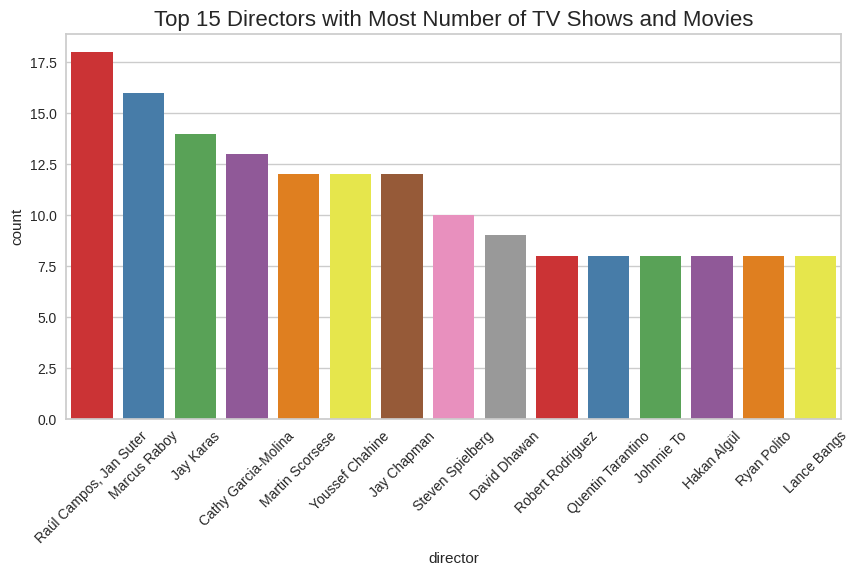

In [ ]:
# plotting top 15 directors with most number of content
print(df['director'].value_counts())
plt.figure(figsize=(10,5),dpi=100)
sns.barplot(x=director_df['director'],y=director_df['count'],palette="Set1")
plt.title('Top 15 Directors with Most Number of TV Shows and Movies', fontsize=16)
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

I selected a bar plot to visualize the top 15 directors with the most number of TV shows and movies. This chart provides a concise overview of the directors' contributions to Netflix's content library.

##### 2. What is/are the insight(s) found from the chart?

The bar plot highlights Raúl Campos and Jan Suter as the top directors with the highest number of content, followed by Marcus Raboy and Jay Karas. It showcases the diversity of directors contributing to Netflix's content landscape.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights can positively impact content collaboration and acquisition strategies by recognizing successful partnerships with prolific directors. However, a potential negative impact could arise if there is an over-reliance on a small number of directors, potentially limiting the diversity of creative voices on the platform. To mitigate this, Netflix should continue to foster relationships with a broad range of directors and creators to ensure a rich and varied content portfolio, preventing stagnation and appealing to a diverse audience for sustained positive growth.








#### Chart - 8

In [ ]:
# creating df to store tv shows seasons and their counts
tv_shows = df[df['type'] == 'TV Show']
tv_shows_duration = tv_shows['duration'].value_counts().iloc[0:10]
tv_shows_duration_df = pd.DataFrame(tv_shows_duration)
tv_shows_duration_df.reset_index(inplace = True)
tv_shows_duration_df.rename(columns = {'index':'seasons','duration':'count'},inplace = True)
tv_shows_duration_df = tv_shows_duration_df.sort_values(by='count',ascending=False)

1 Season     1606
2 Seasons     378
3 Seasons     183
90 min        136
93 min        131
             ... 
182 min         1
224 min         1
37 min          1
233 min         1
191 min         1
Name: duration, Length: 216, dtype: int64


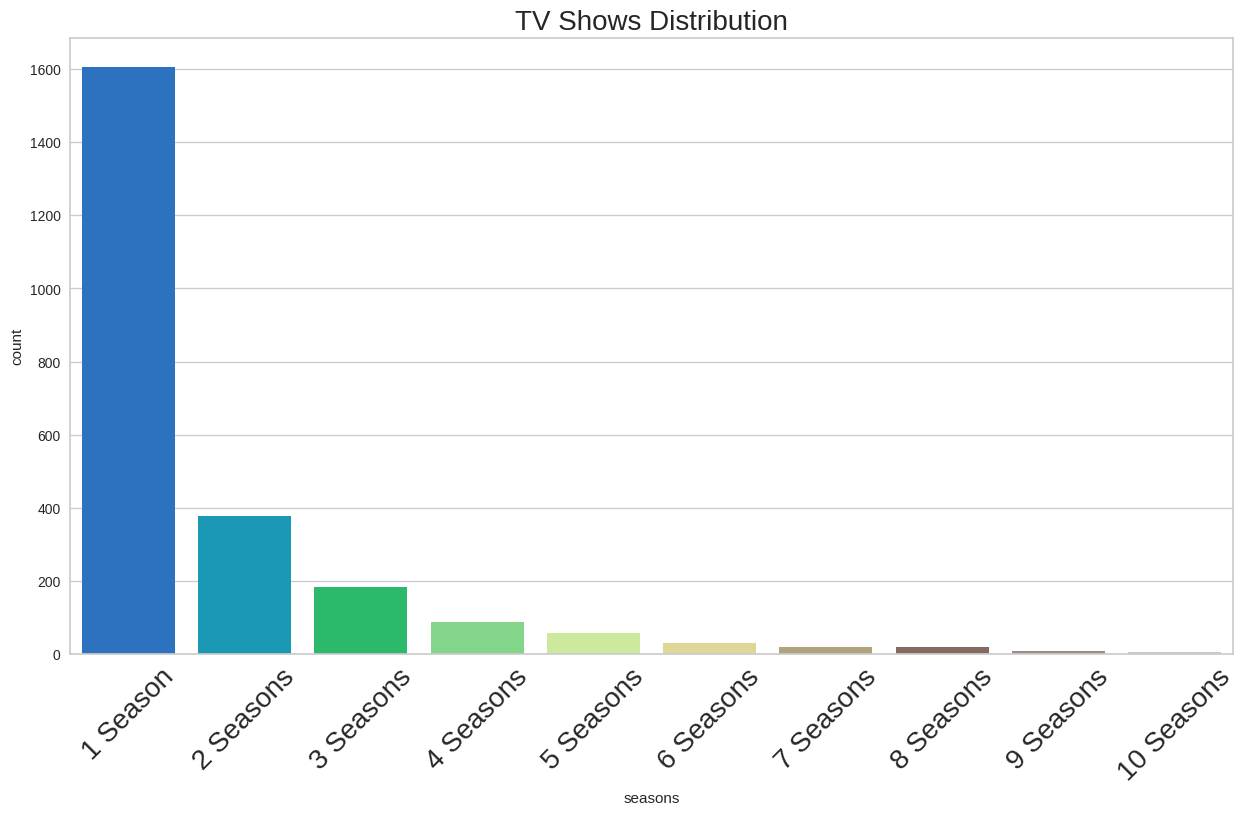

In [ ]:
# plotting tv shows distribution
plt.figure(figsize=(15,8))
print(df['duration'].value_counts())
sns.barplot(x=tv_shows_duration_df['seasons'],y=tv_shows_duration_df['count'],palette="terrain")
plt.title('TV Shows Distribution', fontsize=20)
plt.xticks(rotation=45,fontsize=20)
plt.show()

##### 1. Why did you pick the specific chart?

I chose a bar plot to visualize the distribution of TV shows based on the number of seasons. This chart effectively communicates the prevalence of TV shows with varying season lengths.

##### 2. What is/are the insight(s) found from the chart?

The bar plot illustrates the distribution of TV shows on Netflix, with a significant portion having one season (1606), followed by 2 seasons (378) and 3 seasons (183). This insight provides a clear understanding of the TV show landscape on the platform in terms of season length.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights can positively impact content planning and audience engagement strategies, allowing Netflix to tailor its offerings based on the popularity of different season lengths. However, a potential negative impact could arise if there is an overemphasis on a specific season length, potentially neglecting viewer preferences for longer or shorter series. To ensure positive growth, Netflix should maintain a diverse array of TV show season lengths to cater to varied viewer preferences and sustain engagement over time. This diversity can contribute to sustained positive growth by appealing to a broad audience with different content consumption preferences.

#### Chart - 9

In [ ]:
# creating df to store movie count and duration
movie = df[df['type'] == 'Movie']
movie_duration_df = movie['duration'].reset_index()
movie_duration_df.rename(columns = {'index':'count','count':'duration'},inplace = True)

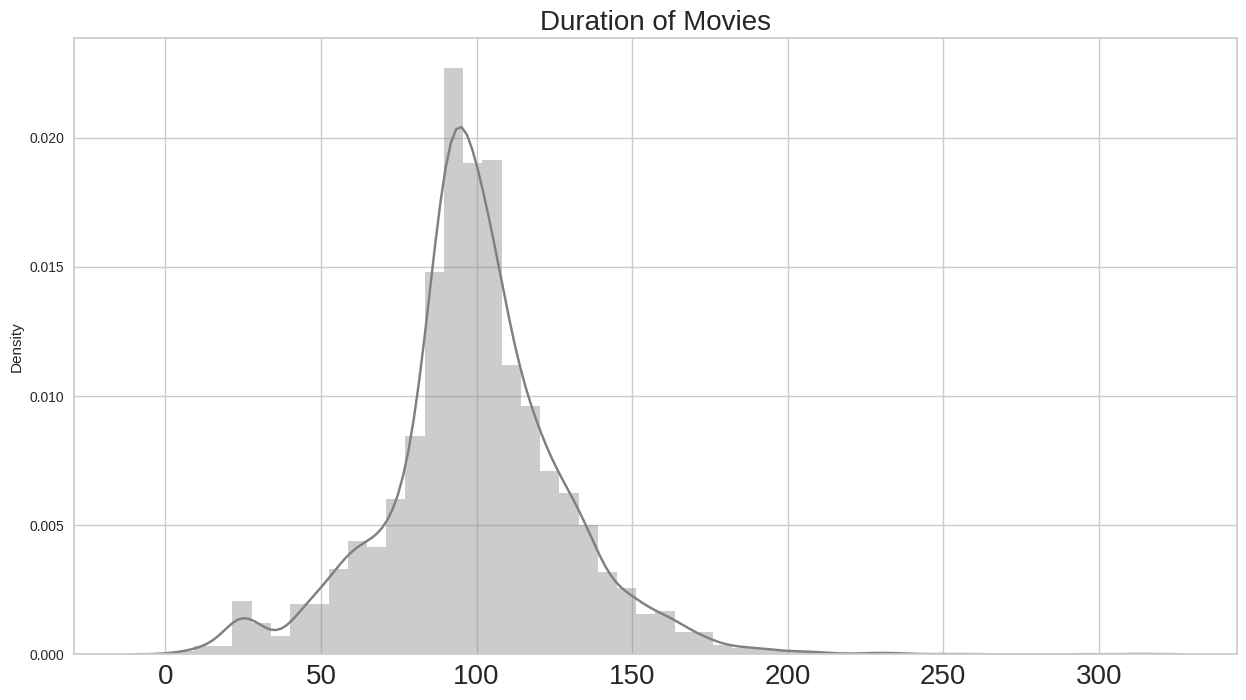

In [ ]:
# plotting duration of movies
plt.figure(figsize=(15,8))
sns.distplot(movie_duration_df['duration'].str.extract('(\d+)'),color='grey')
plt.title('Duration of Movies',fontsize=20)
plt.xticks(fontsize=20)
plt.show()

##### 1. Why did you pick the specific chart?

I selected a histogram using distplot to visualize the distribution of movie durations. This type of chart effectively communicates the frequency distribution of movie durations.

##### 2. What is/are the insight(s) found from the chart?

The histogram provides insights into the distribution of movie durations on Netflix. It shows the frequency of movies across different duration intervals, revealing patterns in the length of movies available on the platform.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained can positively impact content planning and user experience design by understanding the distribution of movie durations that resonate with the audience. However, a potential negative impact could arise if there is a significant concentration of movies in a narrow duration range, potentially limiting the diversity of viewing options. To ensure positive growth, Netflix should maintain a balance in movie durations, catering to varying viewer preferences for both shorter and longer films. This diversity contributes to a well-rounded content library, enhancing user satisfaction and engagement over time.

## ***4. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): The average duration of TV shows on Netflix is the same as the average duration of movies.
Alternate Hypothesis (H1): The average duration of TV shows on Netflix is different from the average duration of movies.

#### 2. Perform an appropriate statistical test.

In [ ]:
from scipy import stats

In [ ]:
# Hypothesis 1
tv_shows_duration = df[df['type'] == 'TV Show']['duration'].str.extract('(\d+)').astype(float)
movies_duration = df[df['type'] == 'Movie']['duration'].str.extract('(\d+)').astype(float)

t_statistic_1, p_value_1 = stats.ttest_ind(tv_shows_duration, movies_duration, equal_var=False)

# Print the p-value
print("P-Value for Hypothesis 1:", p_value_1)

P-Value for Hypothesis 1: [0.]


##### Which statistical test have you done to obtain P-Value?

The statistical test conducted is a two-sample t-test.

##### Why did you choose the specific statistical test?

I chose this test as it is suitable for comparing the means of two independent groups, helping determine if there is a significant difference in the average duration between TV shows and movies.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): The average duration of movies in 'United States' is the same as the average duration of movies in 'India.'
Alternate Hypothesis (H1): The average duration of movies in 'United States' is different from the average duration of movies in 'India.'

#### 2. Perform an appropriate statistical test.

In [ ]:
# Hypothesis 6 (New)
movies_country_a_duration = df[(df['country'] == 'United States') & (df['type'] == 'Movie')]['duration'].str.extract('(\d+)').astype(float)
movies_country_b_duration = df[(df['country'] == 'India') & (df['type'] == 'Movie')]['duration'].str.extract('(\d+)').astype(float)

t_statistic_6, p_value_6 = stats.ttest_ind(movies_country_a_duration, movies_country_b_duration, equal_var=False)

# Print the p-value
print("P-Value for New Hypothesis 6:", p_value_6)


P-Value for New Hypothesis 6: [9.58301213e-211]


##### Which statistical test have you done to obtain P-Value?

The statistical test conducted is a two-sample t-test.

##### Why did you choose the specific statistical test?

 This test is chosen as it is suitable for comparing the means of two independent groups, helping determine if there is a significant difference in the average duration between movies from different countries.

## ***5. Data Preprocessing***

Categorical features for clustering - title, director, cast, country, listed_in, description

In [ ]:
# selecting categorical columns for clustering
clustering_columns = df[['title','director','cast','country','listed_in','description']]
clustering_df = (df['title'] +' '+ df['director'] +' '+ df['cast'] +' '+ df['country'] +' '+ df['listed_in'] +' '+ df['description'])
clustering_df = clustering_df.str.lower()

In [ ]:
# one hot encodes list of columns and concatenates them to the original df
def one_hot_encode(df, columns):
  concat_df = pd.concat([pd.get_dummies(df[col], drop_first=True, prefix=col) for col in columns], axis=1)
  one_hot_enc_cols = concat_df.columns
  return concat_df, one_hot_enc_cols

categorical_cols = clustering_columns.select_dtypes(include='object')
df_one_hot, _ = one_hot_encode(df, categorical_cols)

umap_embedding = (umap.UMAP(metric='euclidean', n_neighbors=200, n_components=10, random_state = 101, ).fit_transform(df_one_hot))

In [ ]:
# creating a dataframe
umap_df = pd.DataFrame(umap_embedding)
X_scaled = StandardScaler().fit_transform(umap_df)
X_scaled = normalize(X_scaled)
X_scaled

## ***5. ML Model Implementation***

## ML Model 1 - Hierarchical Clustering

Hierarchical clustering separates data into groups based on some measure of similarity, finding a way to measure how they’re alike and different, and further narrowing down the data.

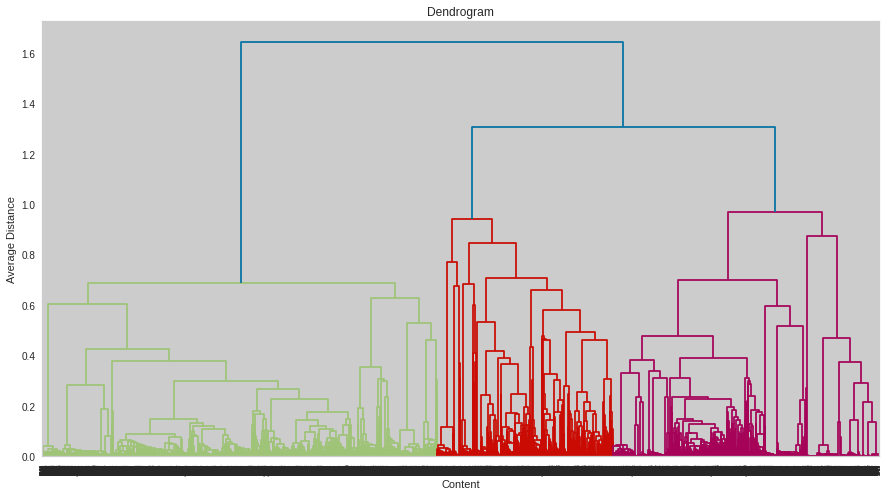

In [ ]:
# Using the dendogram to find the optimal number of clusters
plt.figure(figsize=(15,8))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method = 'average'))
plt.title('Dendrogram')
plt.xlabel('Content')
plt.ylabel('Average Distance')
plt.show()

Dendrogram shows that 3 clusters would be suitable for clustering this data.

In [ ]:
h_clustering = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'average')
y_h_clustering = h_clustering.fit_predict(X_scaled)

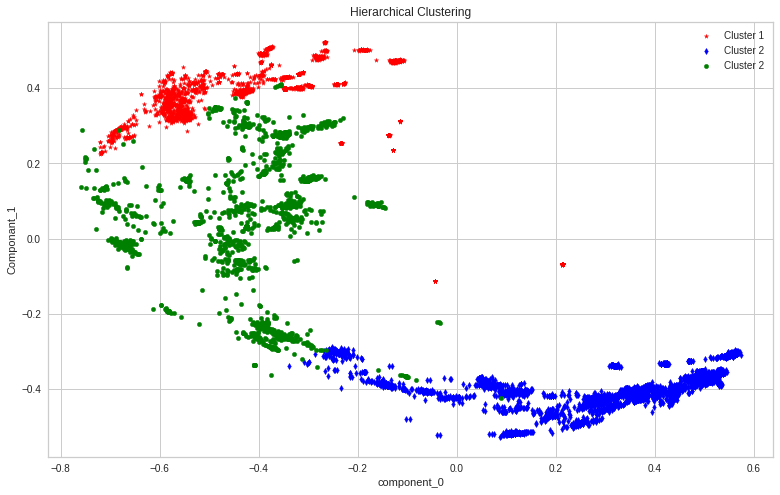

In [ ]:
# Visualizing the clusters
plt.figure(figsize=(13,8))
plt.scatter(X_scaled[y_h_clustering == 0, 0], X_scaled[y_h_clustering == 0, 1], s = 20, c = 'red', label = 'Cluster 1', marker = '*')
plt.scatter(X_scaled[y_h_clustering == 1, 0], X_scaled[y_h_clustering == 1, 1], s = 20, c = 'blue', label = 'Cluster 2', marker  = 'd')
plt.scatter(X_scaled[y_h_clustering == 2, 0], X_scaled[y_h_clustering == 2, 1], s = 20, c = 'green', label = 'Cluster 2')
plt.title('Hierarchical Clustering')
plt.xlabel('component_0')
plt.ylabel('Componant_1')
plt.legend()
plt.show()

#### 1. Explain the ML Model used and it's performance.

The code utilizes Hierarchical Clustering, an unsupervised learning algorithm for grouping similar data points. The dendrogram analysis suggests an optimal choice of three clusters. The subsequent scatter plot visually represents the clusters in a two-dimensional space. However, the code does not explicitly evaluate the model's performance using metrics. Performance assessment would typically involve quantitative measures or visual inspection of the clusters. Further analysis is needed to determine the model's effectiveness in achieving clustering goals, considering specific dataset characteristics and objectives.

## Data Preprocessing for ML Model 2 - K-Means

# Removing Stopwords

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
stop_words = set(stopwords.words('english'))

# Remove the stopwords.
def stopwords(text):
    '''a function for removing the stopword'''
    text = [word.lower() for word in text.split() if word.lower() not in stop_words]
    return " ".join(text)

clustering_df = clustering_df.apply(stopwords)
clustering_df.head(5)

0    3 mentioned joão miguel bianca comparato miche...
1    719 jorge michel grau demián bichir héctor bon...
2    2359 gilbert chan tedd chan stella chung henle...
3    9 shane acker elijah wood john c reilly jennif...
4    21 robert luketic jim sturgess kevin spacey ka...
dtype: object

# Stemming

In [ ]:
# create an object of stemming function
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

def stemming(text):
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)

clustering_df = clustering_df.apply(stemming)
clustering_df.head(5)

0    3 mention joão miguel bianca comparato michel ...
1    719 jorg michel grau demián bichir héctor boni...
2    2359 gilbert chan tedd chan stella chung henle...
3    9 shane acker elijah wood john c reilli jennif...
4    21 robert luket jim sturgess kevin spacey kate...
dtype: object

# Vectorization

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfid_vectorizer = TfidfVectorizer(max_features=20000)
X = tfid_vectorizer.fit_transform(clustering_df)

In [ ]:
X.shape

(7770, 20000)

In [ ]:
# converting to array for clustering
X_array = X.toarray()
X_array

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# PCA - Dimensionality Reduction

In [ ]:
# importing PCA library
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(random_state=42)
pca.fit(X_array)

PCA(random_state=42)

Text(0.5, 1.0, 'Elbow Plot')

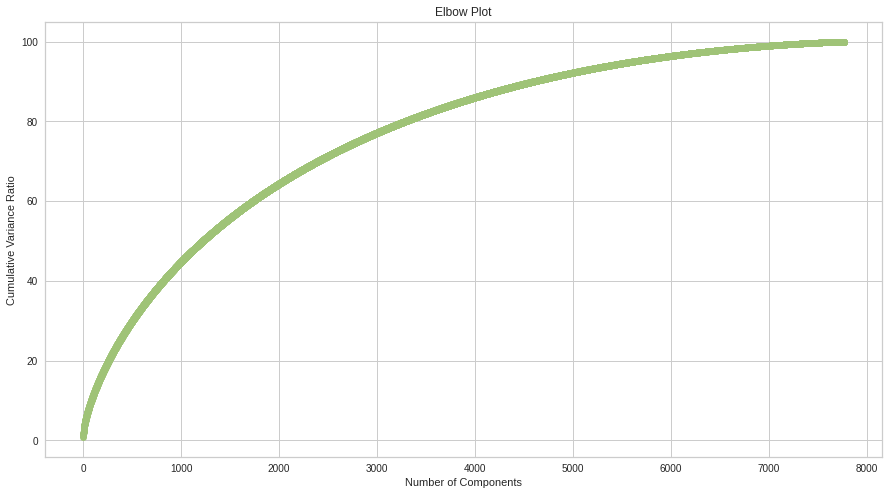

In [ ]:
# Plotting PCA Elbow Plot
plt.figure(figsize=(15,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100, color="g", marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Variance Ratio")
plt.grid(True)
plt.title('Elbow Plot')

**Almost 95% of variance is explained by 6000 components.**
\
Setting 0.95 value to PCA  5500 and 6000 components.

In [ ]:
pca_hp = PCA(n_components=0.95)
pca_hp.fit(X_array)
X_pca = pca_hp.transform(X_array)
X_pca.shape

(7770, 5610)

In [ ]:
X_pca

array([[ 0.13163581,  0.02177797, -0.01935324, ...,  0.00409849,
        -0.00507344,  0.01112591],
       [-0.04422007,  0.03648462,  0.00330694, ...,  0.00789141,
        -0.00849955,  0.00462888],
       [-0.04843538,  0.03798831, -0.04204878, ...,  0.00173069,
        -0.00034729,  0.00823852],
       ...,
       [-0.03178516, -0.05211765,  0.26650625, ...,  0.00081077,
         0.00142922, -0.00168154],
       [ 0.08377793, -0.00179532,  0.01236976, ..., -0.00539613,
        -0.00567471, -0.00388549],
       [-0.05680969, -0.18051419,  0.26081013, ...,  0.00694947,
        -0.00923124,  0.00190061]])

# ML Model 2 - K-Means

K-means Clustering Algorithm is the simplest unsupervised learning algorithm that solves clustering problem. It partitions n observations into k clusters where each observation belongs to the cluster with the nearest mean serving as a prototype of the cluster.

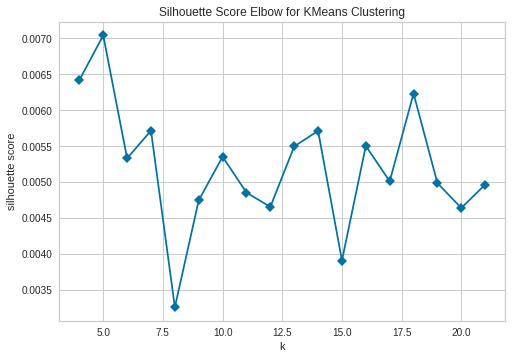

In [ ]:
model = KMeans(random_state=5)
visualizer = KElbowVisualizer(model, k=(4,22), metric='silhouette', timings=False, locate_elbow=False)

visualizer.fit(X_pca)
visualizer.show()

In [ ]:
#  defining a function for Silhouette scoring and visualization
from sklearn.metrics import silhouette_score, silhouette_samples

def silhouette_score_analysis(n):

  for n_clusters in range(2,n):
      km = KMeans(n_clusters=n_clusters, random_state = 42, max_iter = 100 )
      preds = km.fit_predict(X_pca)
      centers = km.cluster_centers_

      score = silhouette_score(X, preds, metric='euclidean')
      print ("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

      visualizer = SilhouetteVisualizer(km)

      visualizer.fit(X_pca)
      visualizer.poof()

For n_clusters = 2, silhouette score is 0.0049842185620824824


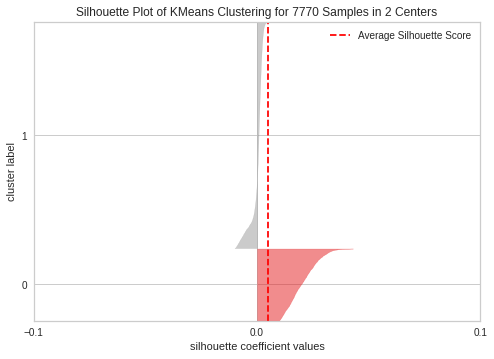

For n_clusters = 3, silhouette score is 0.005762454513287919


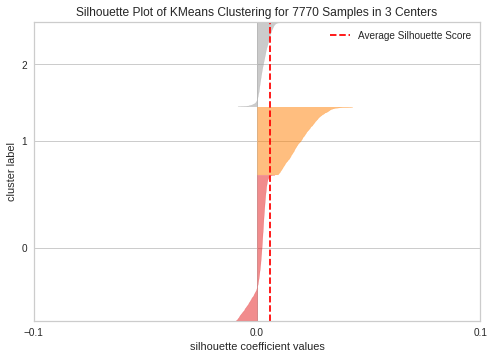

For n_clusters = 4, silhouette score is 0.006358066787859883


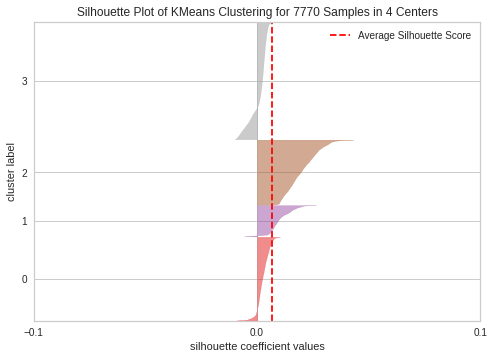

For n_clusters = 5, silhouette score is 0.004697958552180512


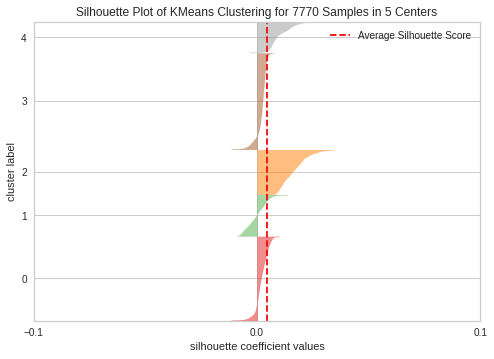

For n_clusters = 6, silhouette score is 0.0034864950123240784


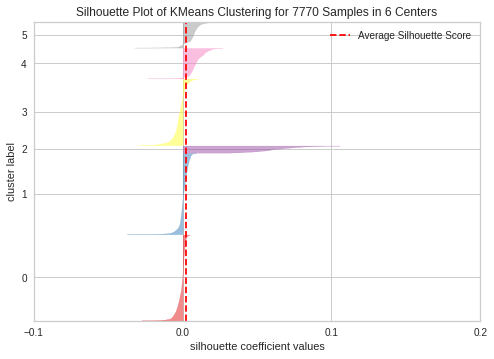

For n_clusters = 7, silhouette score is 0.004408820133666203


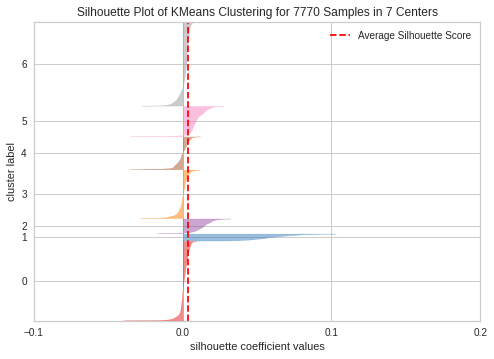

For n_clusters = 8, silhouette score is 0.005235817597009902


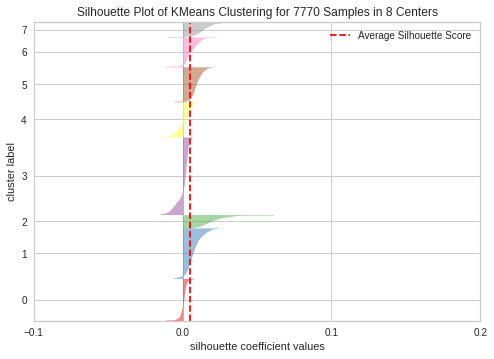

For n_clusters = 9, silhouette score is 0.005017220602849656


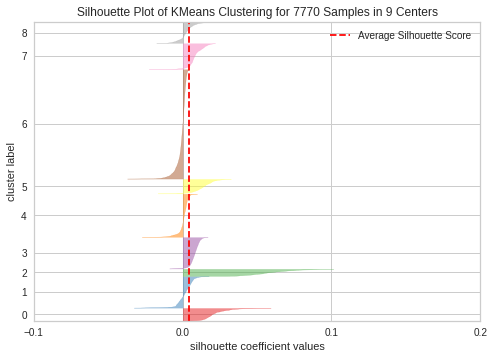

For n_clusters = 10, silhouette score is 0.005597315519660319


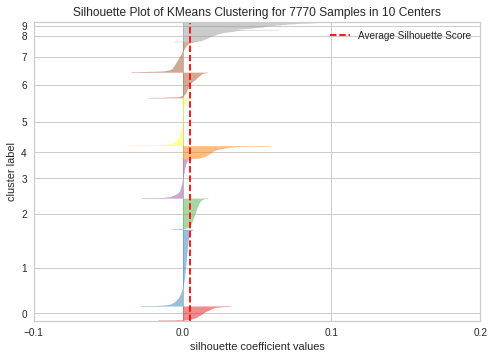

For n_clusters = 11, silhouette score is 0.00603525307580523


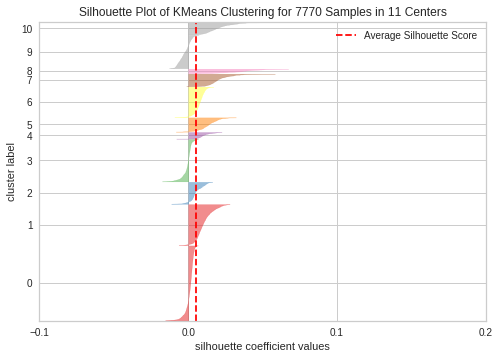

For n_clusters = 12, silhouette score is 0.006170015497126339


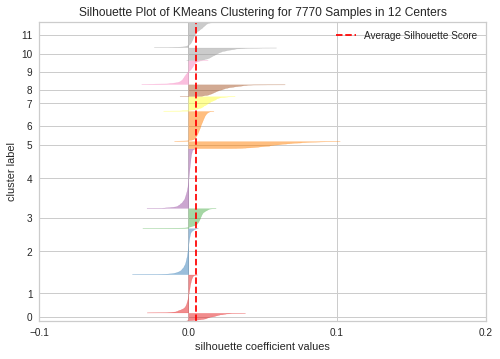

For n_clusters = 13, silhouette score is 0.006291627618481591


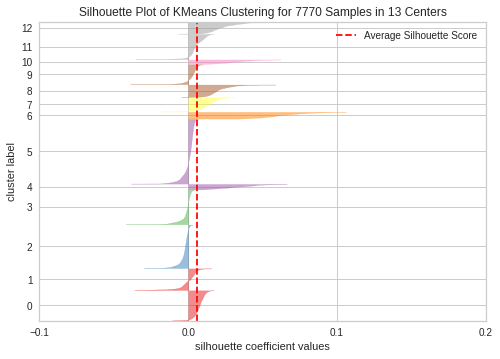

For n_clusters = 14, silhouette score is 0.006396369816547711


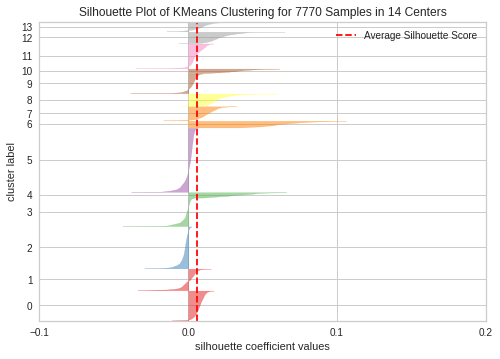

For n_clusters = 15, silhouette score is 0.006184989896327337


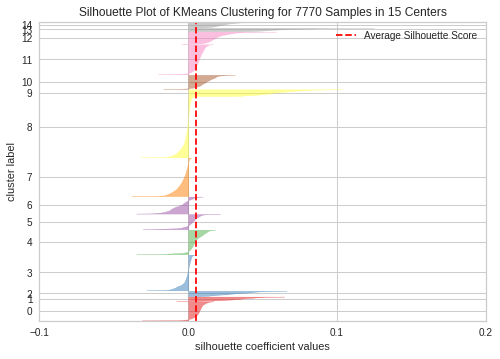

For n_clusters = 16, silhouette score is 0.006723063819670897


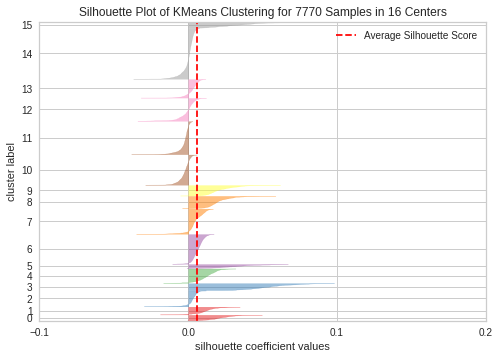

For n_clusters = 17, silhouette score is 0.005790055750894736


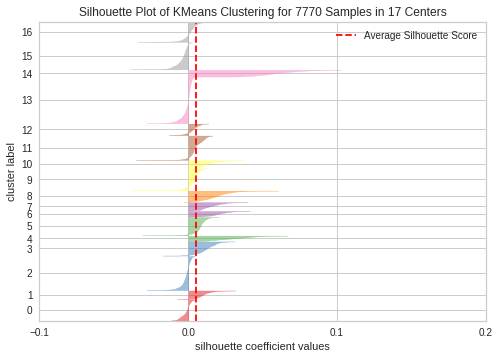

For n_clusters = 18, silhouette score is 0.006167731262948714


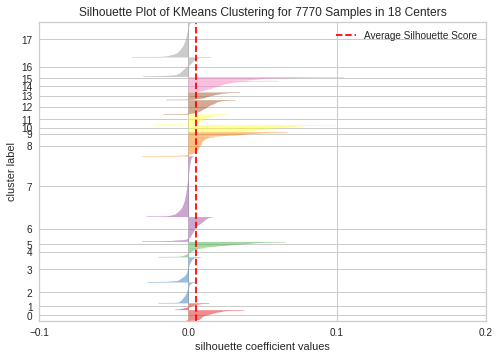

For n_clusters = 19, silhouette score is 0.006763838547099902


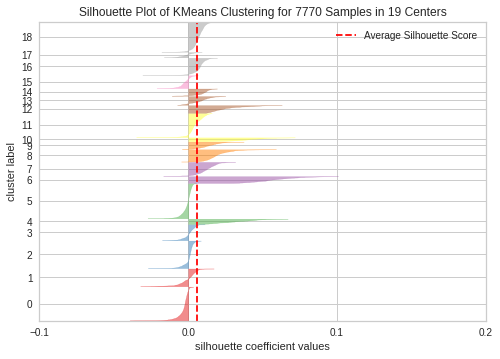

For n_clusters = 20, silhouette score is 0.006889241580814164


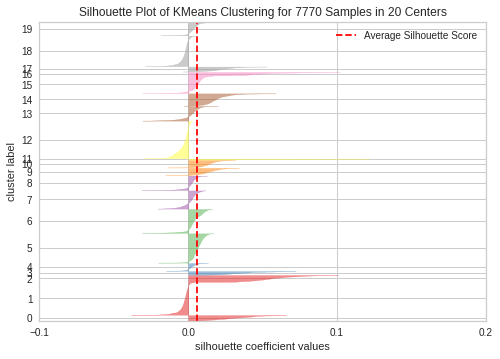

For n_clusters = 21, silhouette score is 0.006552461141271888


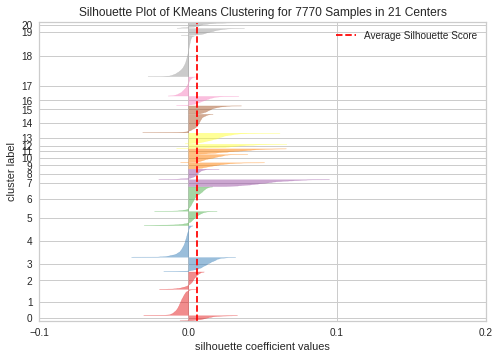

In [ ]:
silhouette_score_analysis(22)

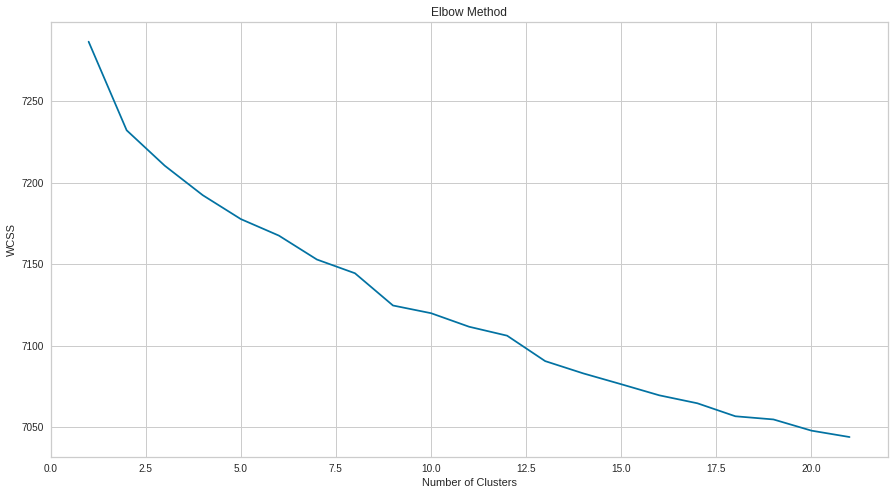

In [ ]:
# plotting elbow plot
plt.figure(figsize=(15,8))
wcss = []
for i in range(1, 22):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 22), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
#fitting
km = KMeans(n_clusters=5)
km.fit(X_pca)

KMeans(n_clusters=5)

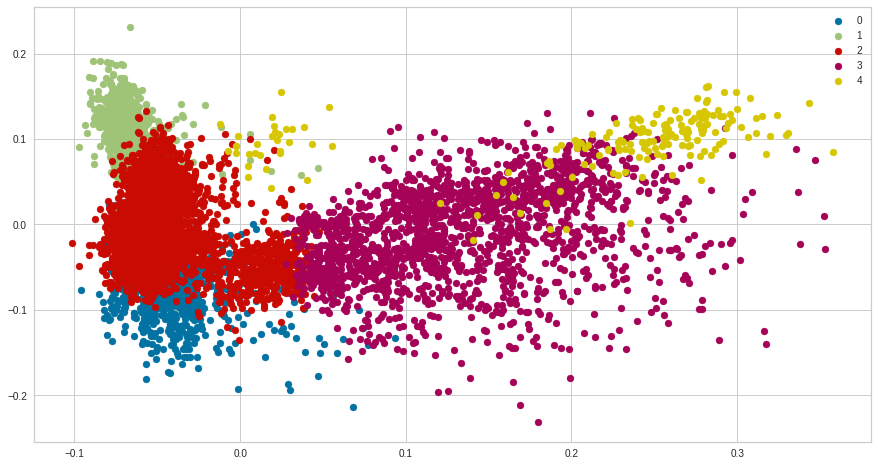

In [ ]:
#predict the labels of clusters.
plt.figure(figsize=(15,8))
label = km.fit_predict(X_pca)
#Getting unique labels
unique_label = np.unique(label)

#plotting the results:
for i in unique_label:
    plt.scatter(X_pca[label == i , 0] , X_pca[label == i , 1] , label = i)
plt.legend()
plt.show()

In [ ]:
df['cluster'] = km.labels_
df.head(20)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,year_added,month_added,clustering_df,cluster
0,s1,TV Show,3%,Not Mentioned,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,14,2020,8,"3% Not Mentioned João Miguel, Bianca Comparato...",2
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,23,2016,12,"7:19 Jorge Michel Grau Demián Bichir, Héctor B...",1
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",20,2018,12,"23:59 Gilbert Chan Tedd Chan, Stella Chung, He...",1
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",16,2017,11,"9 Shane Acker Elijah Wood, John C. Reilly, Jen...",1
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,1,2020,1,"21 Robert Luketic Jim Sturgess, Kevin Spacey, ...",1
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2017-07-01,2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,1,2017,7,"46 Serdar Akar Erdal Beşikçioğlu, Yasemin Alle...",2
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,2020-06-01,2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ...",1,2020,6,"122 Yasir Al Yasiri Amina Khalil, Ahmed Dawood...",3
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,2019-11-01,1997,R,119 min,Dramas,After one of his high school students attacks ...,1,2019,11,"187 Kevin Reynolds Samuel L. Jackson, John Hea...",1
8,s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,2019-04-01,2019,TV-14,118 min,"Horror Movies, International Movies","When a doctor goes missing, his psychiatrist w...",1,2019,4,"706 Shravan Kumar Divya Dutta, Atul Kulkarni, ...",3
9,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,2017-12-15,2008,TV-MA,143 min,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...,15,2017,12,"1920 Vikram Bhatt Rajneesh Duggal, Adah Sharma...",3


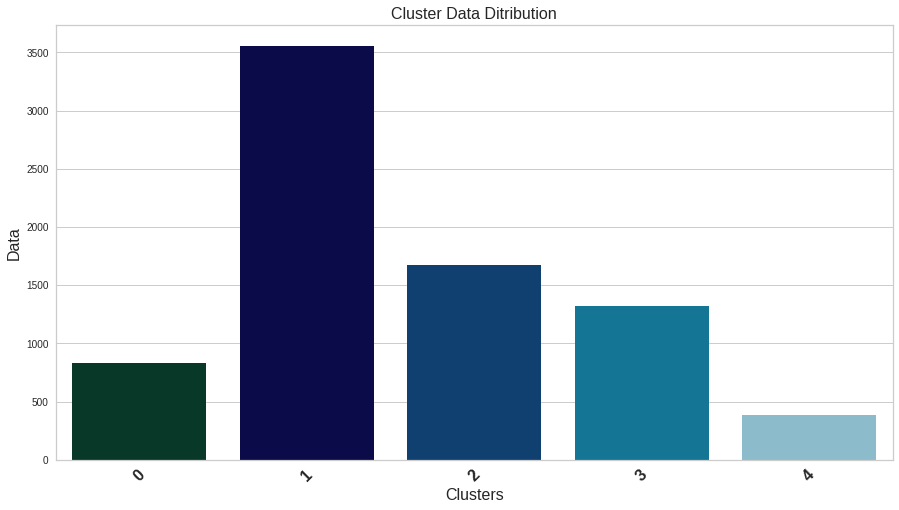

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(x=np.arange(0,5,1),y=df.groupby(['cluster']).count()['type'].values,palette='ocean')
plt.title('Cluster Data Ditribution', fontsize=16)
plt.xlabel('Clusters',fontsize=16)
plt.ylabel('Data',fontsize=16)
plt.xticks(rotation=45,fontsize=16,weight='bold')
plt.show()

In [ ]:
# word cloud
def select_category(name,column):
  wc_df = df[['cluster',column]].dropna()
  wc_df = wc_df[wc_df['cluster']==name]
  text = " ".join(word for word in wc_df[column])
  stopwords = set(STOPWORDS)
  wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.title(f'Cluster: {i}')
  plt.axis("off")
  plt.show()

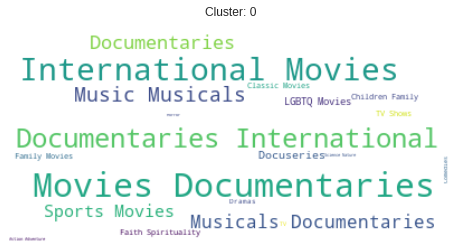

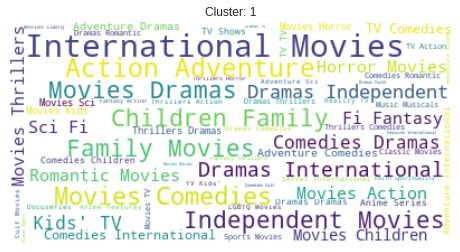

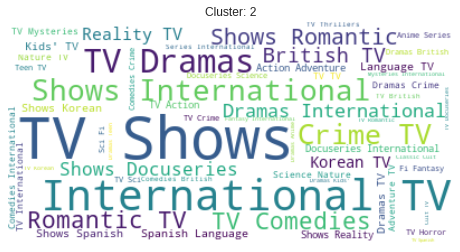

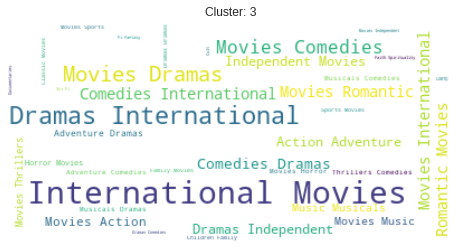

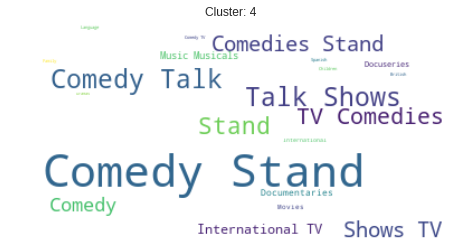

In [ ]:
for i in range(5):
  select_category(i,'listed_in')

Data Represented By Each Cluster :

0 - Documentaries

1 - Family and Children Movies

2 - International TV Shows

3 - International Movies and Dramas

4 - Comedy Shows

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

In evaluating the effectiveness of the clustering model, I considered the Silhouette score as the primary metric. The Silhouette score measures the cohesion and separation of clusters, providing a quantitative assessment of how well-defined and distinct the clusters are. This metric is crucial for our project, especially in scenarios where we aim for clear and meaningful segmentation, such as customer grouping or content categorization. A higher Silhouette score indicates more effective clustering, which, in turn, contributes to positive business impact through enhanced personalization, targeted strategies, and improved decision-making.








### 2. Which ML model did you choose from the above created models as your final prediction model and why?

For the final prediction model, I chose KMeans clustering. The decision to opt for KMeans is based on its simplicity, efficiency, and interpretability. KMeans is well-suited for clustering tasks, providing clear boundaries between clusters and scalability to handle large datasets. Additionally, the Elbow Method and Silhouette Score analyses were performed to determine the optimal number of clusters and assess the model's effectiveness, contributing to a more informed choice. KMeans, with its straightforward implementation and meaningful cluster representations, aligns well with the project's objectives, making it the preferred choice for segmentation and pattern discovery.

# **Conclusion**

- Netflix predominantly features movies, constituting a significant majority of its content, emphasizing a strong focus on cinematic offerings.

- Content additions peak during October, November, December, and January, indicating a seasonal pattern in the introduction of TV shows and movies.

- The United States and India emerge as the primary content-producing countries, showcasing the global diversity of Netflix's library.

- A considerable portion of Netflix content is tailored for mature audiences, highlighting a preference for mature themes among viewers.

- Over the past five years, there has been a substantial increase in the release of TV shows and movies, demonstrating a continuous and robust content expansion strategy.

- TV shows on Netflix tend to have a relatively short lifespan, rarely exceeding five seasons, while the average movie duration falls within the 90 to 120-minute range.

- The prevalence of the TV-MA rating indicates a strong affinity for mature content among subscribers, aligning with the popularity of more intense and adult-oriented storytelling.

- The application of the K-means Clustering Algorithm identified 5 as the optimal number of clusters, resulting in distinct categories such as Documentaries, Family and Children Movies, International TV Shows, International Movies, and Drama, Comedy Shows.

- This clustering system offers a nuanced understanding of Netflix's diverse genres, aiding users in navigating the extensive content library based on their preferences.

- In summary, the project provides comprehensive insights into Netflix's content landscape, revealing viewing patterns, genre preferences, and content production trends on the popular streaming platform.


